In [42]:
import os

# import libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import warnings
warnings.filterwarnings('ignore')

In [43]:
os.chdir("res")

In [44]:
# load dataset and EDA
df = pd.read_csv("heart_disease_uci.csv")
df = df.drop(['id'],axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       920 non-null    int64  
 1   sex       920 non-null    object 
 2   dataset   920 non-null    object 
 3   cp        920 non-null    object 
 4   trestbps  861 non-null    float64
 5   chol      890 non-null    float64
 6   fbs       830 non-null    object 
 7   restecg   918 non-null    object 
 8   thalch    865 non-null    float64
 9   exang     865 non-null    object 
 10  oldpeak   858 non-null    float64
 11  slope     611 non-null    object 
 12  ca        309 non-null    float64
 13  thal      434 non-null    object 
 14  num       920 non-null    int64  
dtypes: float64(5), int64(2), object(8)
memory usage: 107.9+ KB


<Figure size 640x480 with 0 Axes>

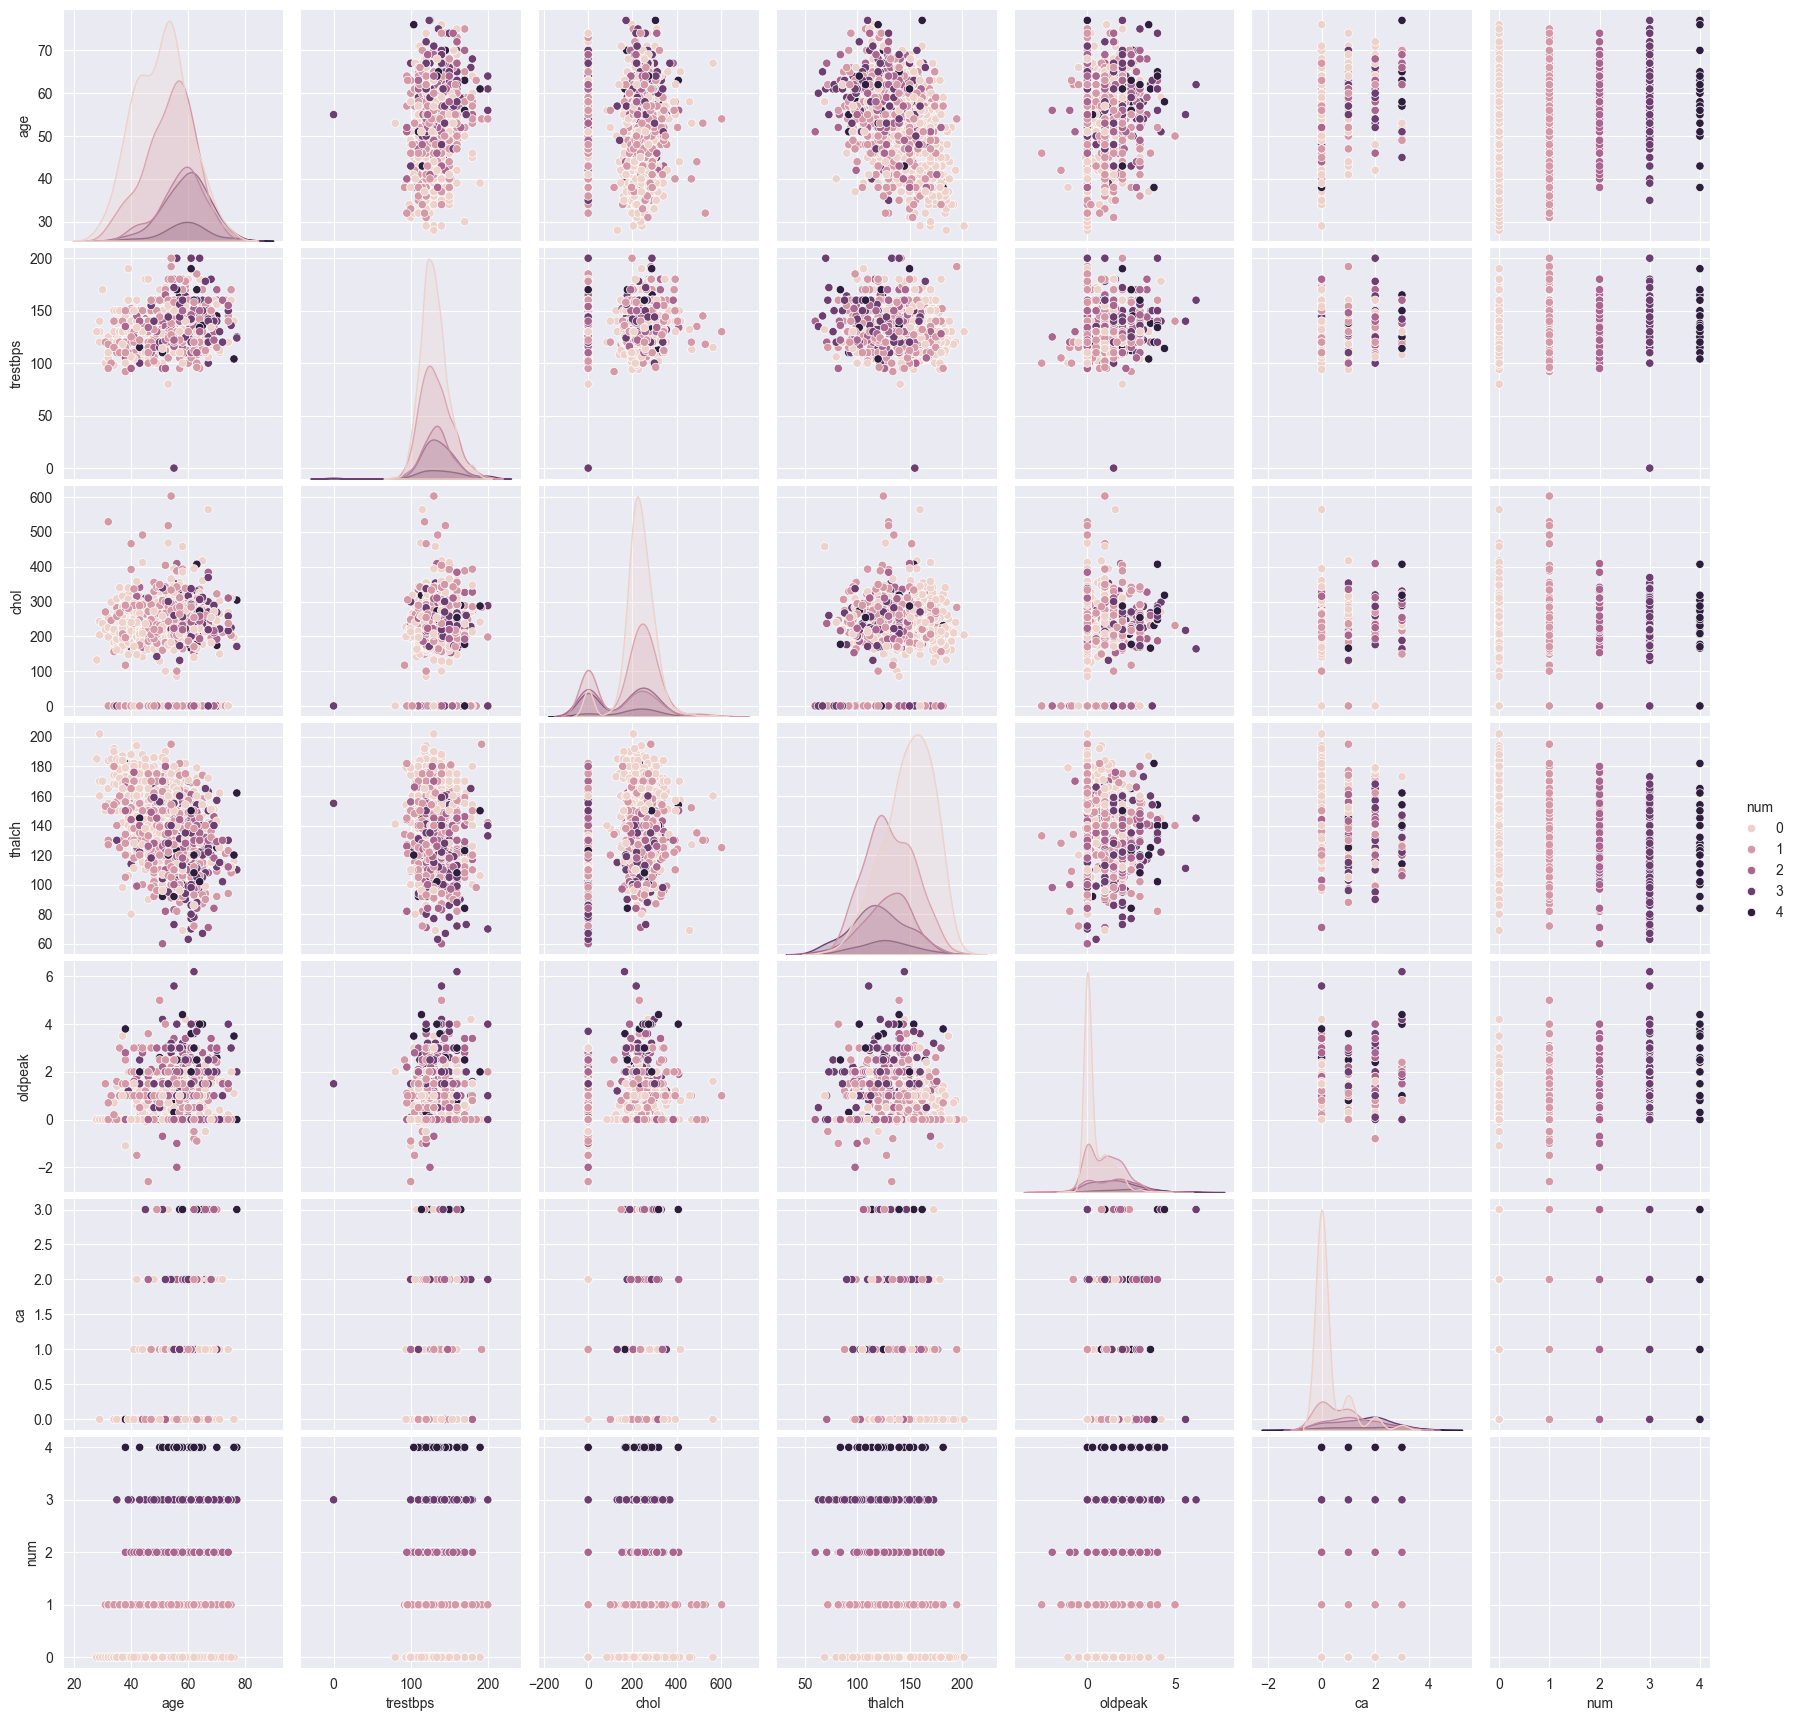

In [45]:
numerical_futures = df.select_dtypes(include=[np.number]).columns.tolist()

plt.figure()
sns.pairplot(df,vars=numerical_futures,hue="num")
plt.show()

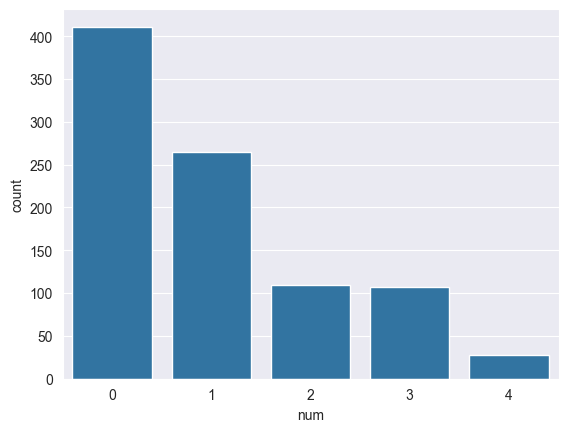

In [46]:
plt.figure()
sns.countplot(x="num",data=df)
plt.show()

In [47]:
# handling missing value
print(df.isnull().sum()) # ca -> 611 loss so:
df = df.drop(['ca'],axis=1)
df.columns


age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64


Index(['age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
       'thalch', 'exang', 'oldpeak', 'slope', 'thal', 'num'],
      dtype='object')

In [48]:
def fill_with_median(col): # numeric
    df[col].fillna(df[col].median(), inplace=True)

def fill_with_mode(col): # categorical
    df[col].fillna(df[col].mode()[0], inplace=True)  


In [50]:
# numeric
fill_with_median('trestbps')
fill_with_median('chol')
fill_with_median('thalch')
fill_with_median('oldpeak')

# categorical
fill_with_mode('fbs')
fill_with_mode('restecg')
fill_with_mode('exang')
fill_with_mode('thal')
fill_with_mode('slope')


df.isnull().sum()
    

age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
thal        0
num         0
dtype: int64